# Model Evaluation

In this notebook we will choose the 4 models. 

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import shutil

from CogniPredictAD.classification import ADNIClassifier

pd.set_option('display.max_rows', 116)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_info_columns', 40) 


train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Target column
y_train = train['DX']

# All other columns as features
X_train = train.drop(columns=['DX'])

# Target column
y_test = test['DX']

# All other columns as features
X_test = test.drop(columns=['DX'])

classifier = ADNIClassifier()

## Dataset with `CDRSB`, `LDELTOTAL`, and `mPACCdigit` with Classification

**Let's see which of these models performs best on the test set and which one will therefore be chosen. Models ending with 0 are models built without using sampling, while those ending with 1 are models built using Hybrid Sampling.**

Evaluating model: Bagging0
Evaluating model: Bagging1
Evaluating model: CatBoost0
Evaluating model: CatBoost1
Evaluating model: Decision_Tree0
Evaluating model: Decision_Tree1
Evaluating model: Extra_Trees0
Evaluating model: Extra_Trees1
Evaluating model: LightGBM0
Evaluating model: LightGBM1
Evaluating model: Multinomial_Logistic_Regression0
Evaluating model: Multinomial_Logistic_Regression1
Evaluating model: Random_Forest0
Evaluating model: Random_Forest1
Evaluating model: XGBoost0
Evaluating model: XGBoost1


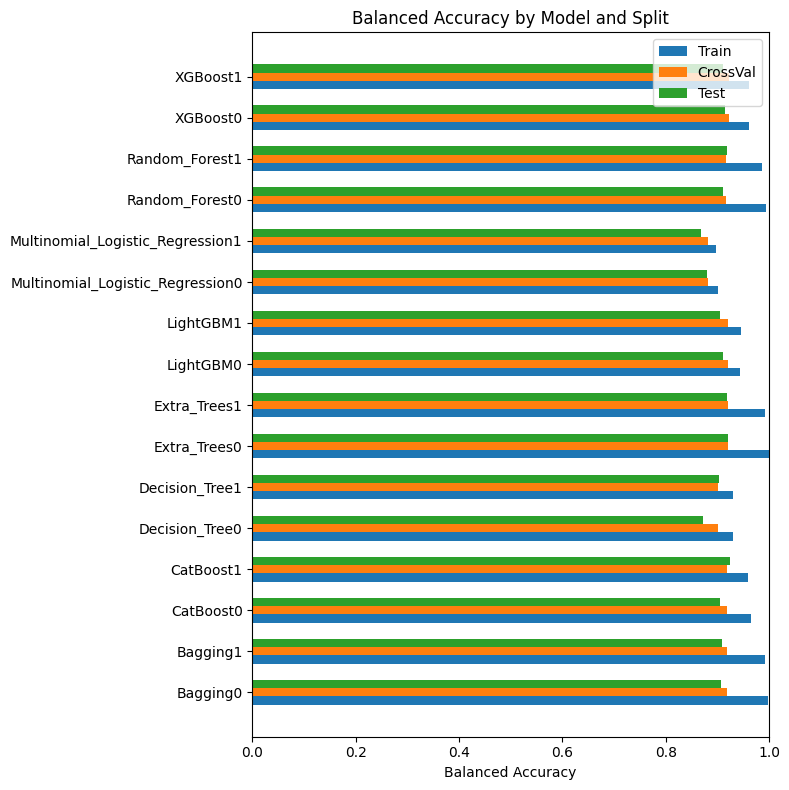


Confusion matrices (raw counts) - TEST SET:


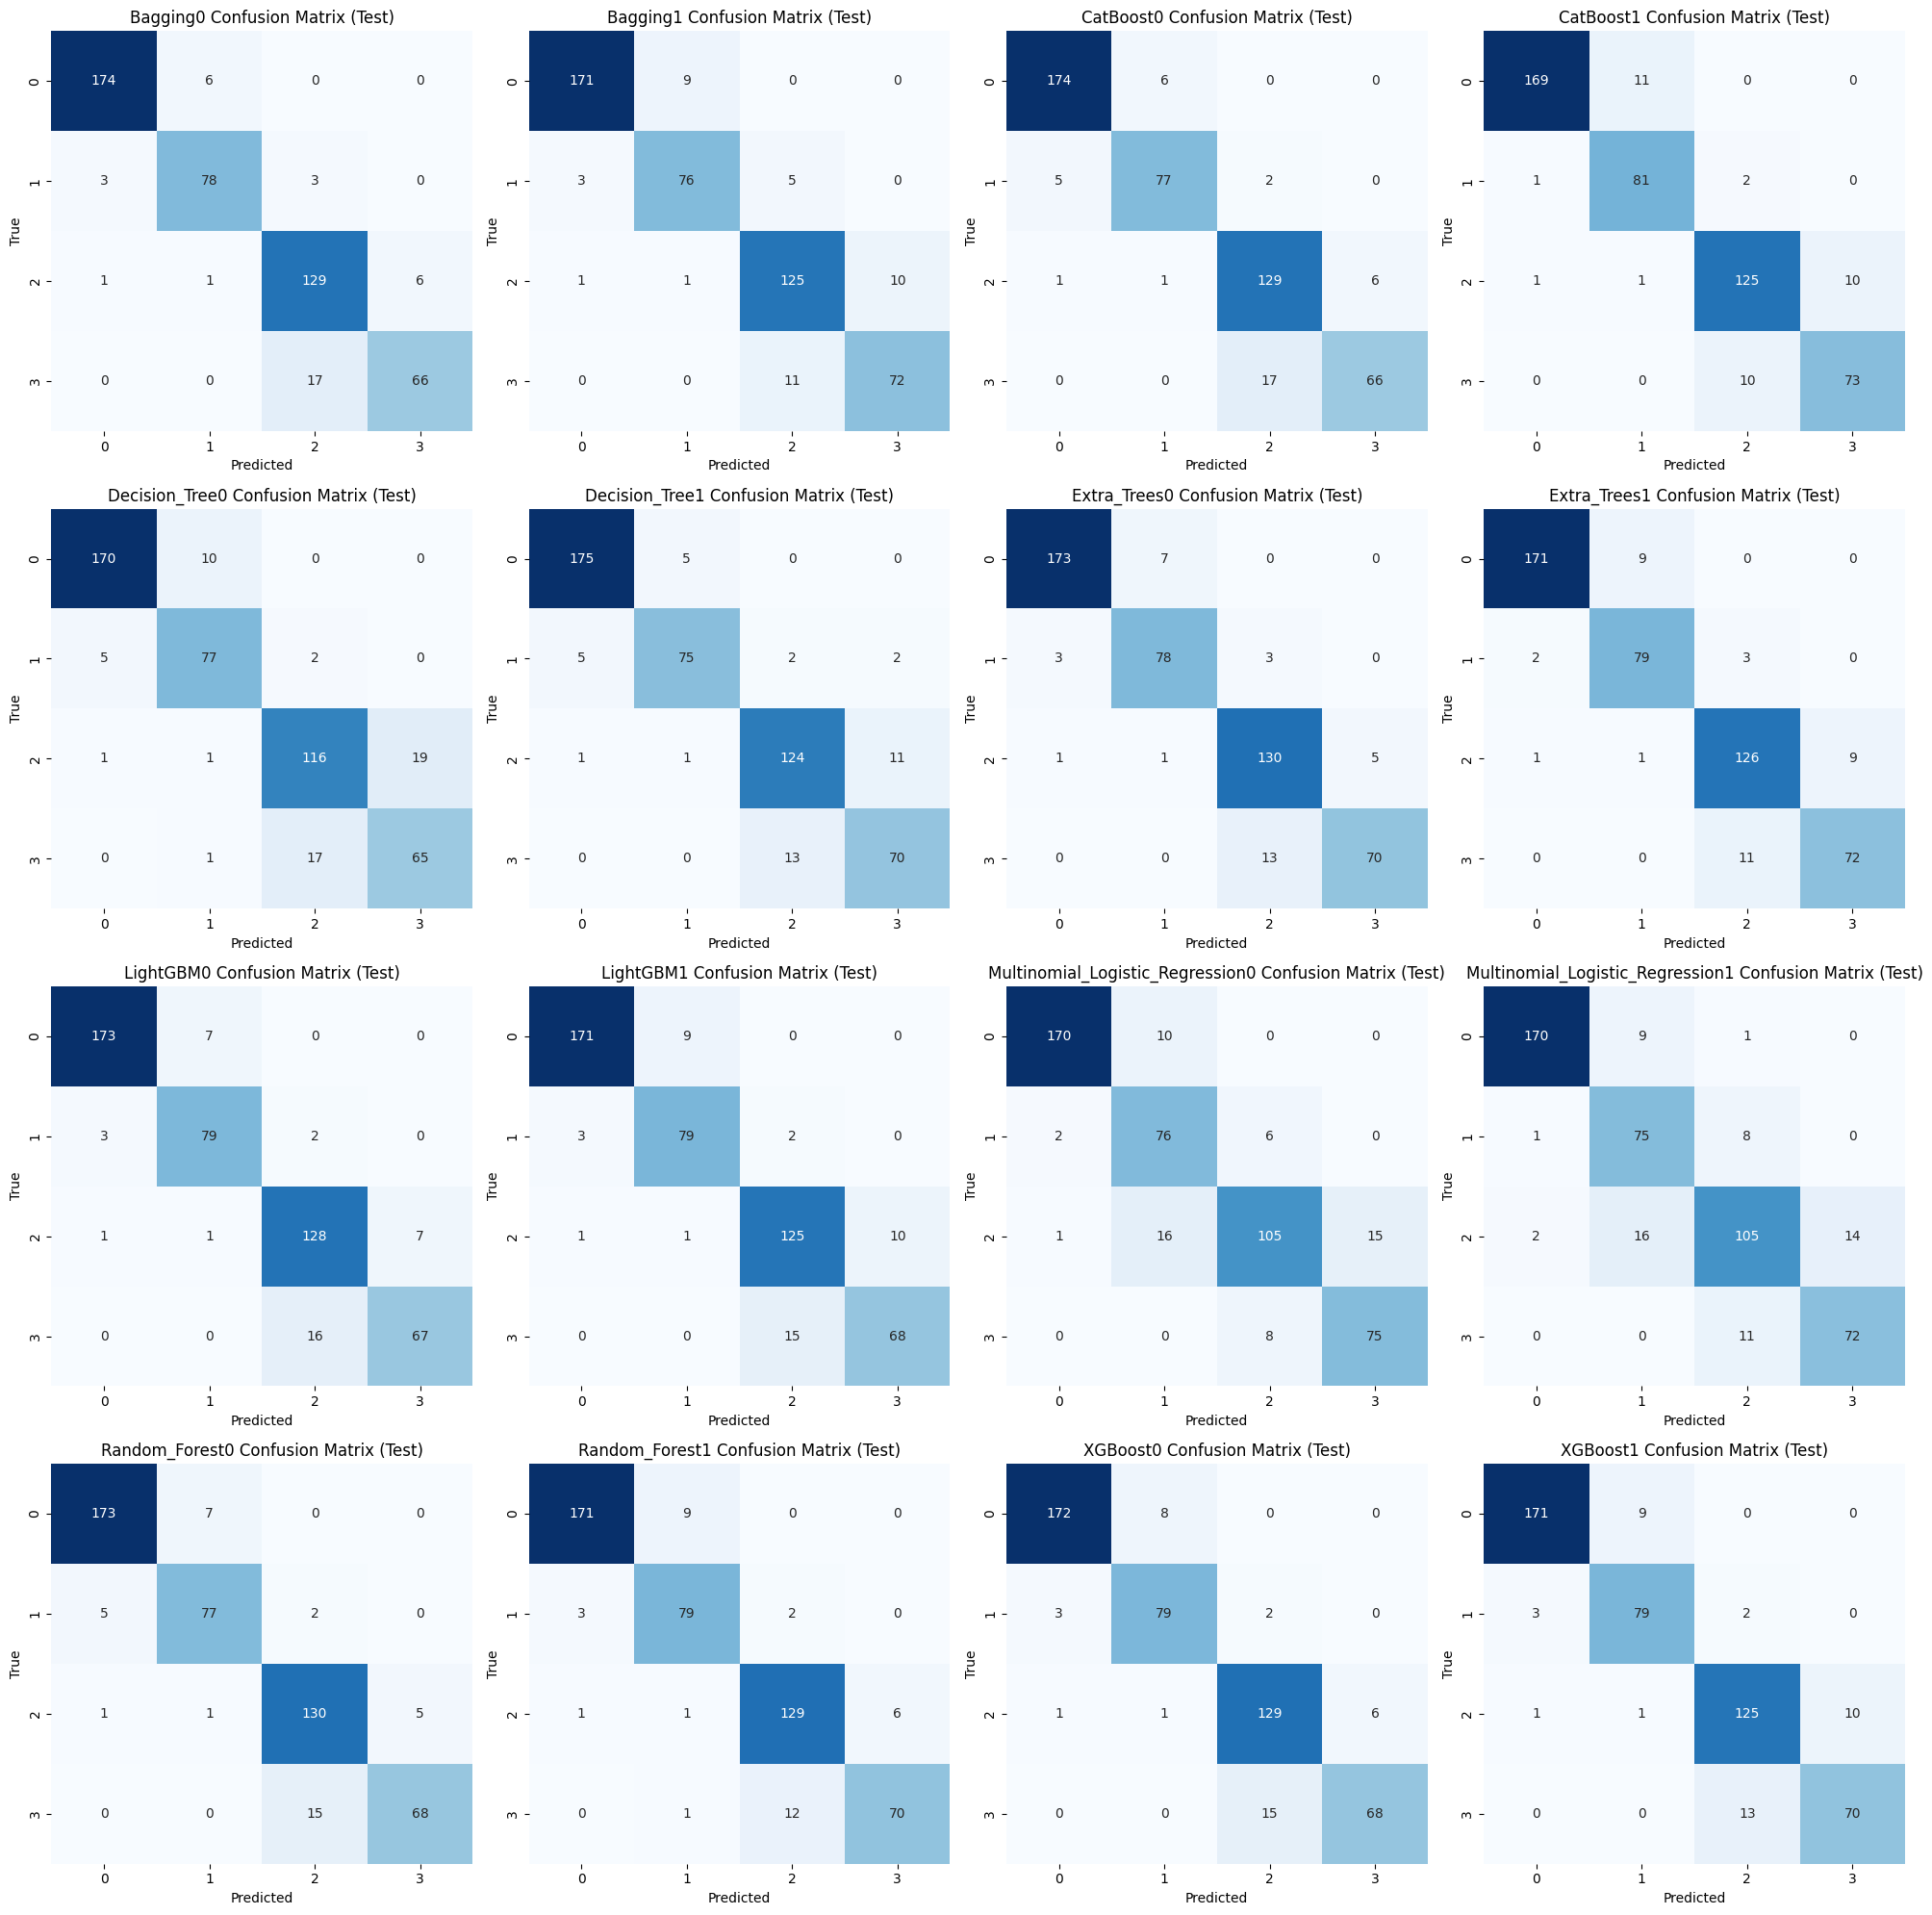


Confusion matrices (normalized by true-row) - TEST SET:


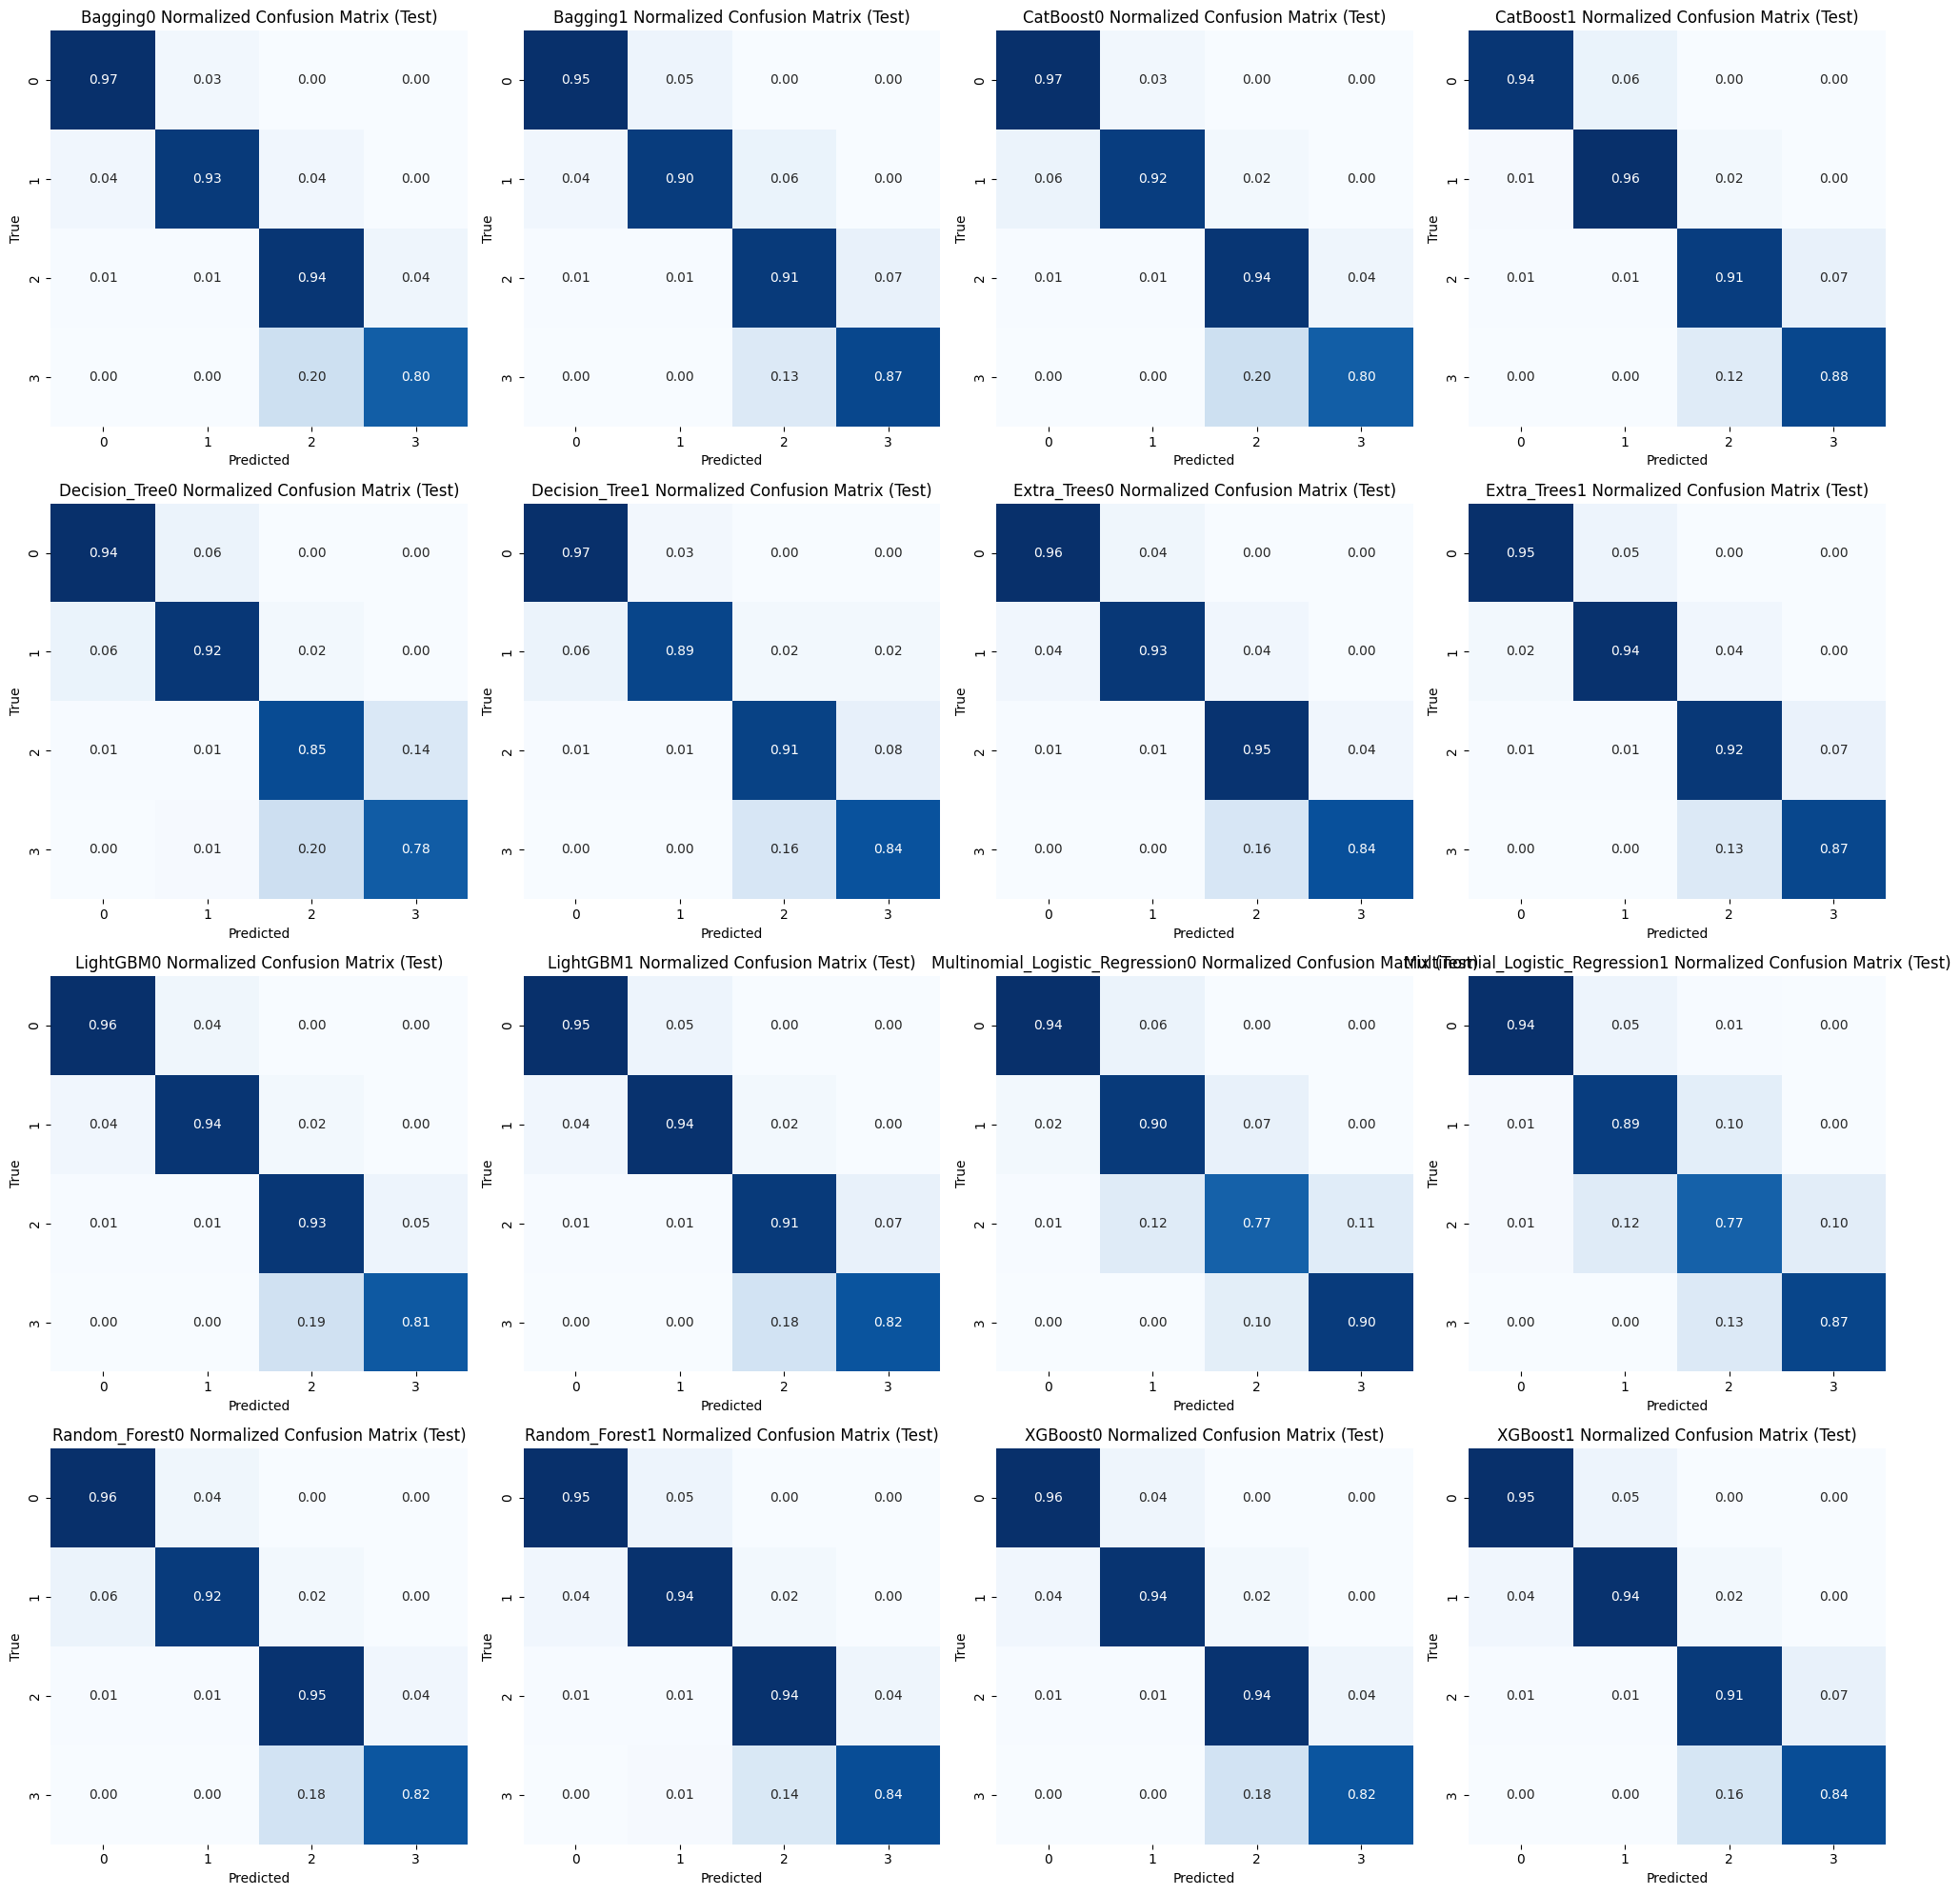


Overall comparison on TEST SET (sorted by Balanced Accuracy):


,Accuracy,Balanced Accuracy,Precision (weighted),Recall (weighted),F1 Score (weighted),F1 Score (macro),ROC AUC (macro)
Model,,,,,,,
CatBoost1,0.925620,0.923775,0.927802,0.925620,0.926063,0.917536,0.988873
Extra_Trees0,0.931818,0.920490,0.932998,0.931818,0.931707,0.922910,0.989527
Extra_Trees1,0.925620,0.919414,0.926728,0.925620,0.925885,0.916798,0.985708
Random_Forest1,0.927686,0.918864,0.929037,0.927686,0.927690,0.918339,0.986426
XGBoost0,0.925620,0.914229,0.926935,0.925620,0.925395,0.915700,0.987676
XGBoost1,0.919421,0.911565,0.920235,0.919421,0.919545,0.909524,0.987973
Random_Forest0,0.925620,0.911490,0.926719,0.925620,0.925223,0.915580,0.983885
LightGBM0,0.923554,0.910781,0.924517,0.923554,0.923219,0.912815,0.985721
Bagging1,0.917355,0.908660,0.918286,0.917355,0.917670,0.907376,0.982109


In [2]:
out1 = classifier.evaluate_models_from_dir(
                models_dir="../results/all_models/1",
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                cv_splits=5, cv_repeats=3,
                display_individual_tables=False
            )

***CatBoost1***, the CatBoost model created with Hybrid Sampling, achieves the best Balanced Accuracy on the test set (0.9238), meaning the best average ability to correctly classify classes even in the presence of imbalance. It also performs very well on other metrics, such as Accuracy (0.9256) and Weighted F1 (0.9261). Its macro ROC-AUC is very high (0.9889). These values ​​indicate both good discrimination and good aggregate performance.

***In summary, we choose CatBoost1 because it combines the best balance between sensitivity/specificity between classes (balanced accuracy) with excellent discrimination (ROC-AUC) and excellent F1/Accuracy. We will call it Model1.*** 

Additionally, we choose a Decision Tree to favor a model with high explainability. ***We choose Decision_Tree1 given its greater balanced accuracy and its higher ROC-AUC score compared to Decision_Tree0. We will cal it XAIModel1.***

In [3]:
src_path = "../results/all_models/1/CatBoost1.pkl"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "Model1.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/1/Decision_Tree1.pkl"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel1.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/1/trees/Decision_Tree1_tree.pdf"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel1_tree.pdf")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/1/rules/Decision_Tree1_rules.txt"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel1_rules.txt")
shutil.copy2(src_path, dest_file)

print("Saved Models: Model1, XAIModel1")

Saved Models: Model1, XAIModel1


## Dataset without `CDRSB`, `LDELTOTAL`, and `mPACCdigit` with Classification

**Let's see which of these models performs best on the test set and which one will therefore be chosen. Models ending with 0 are models built without using sampling, while those ending with 1 are models built using Hybrid Sampling.**

Evaluating model: Bagging0
Evaluating model: Bagging1
Evaluating model: CatBoost0
Evaluating model: CatBoost1
Evaluating model: Decision_Tree0
Evaluating model: Decision_Tree1
Evaluating model: Extra_Trees0
Evaluating model: Extra_Trees1
Evaluating model: LightGBM0
Evaluating model: LightGBM1
Evaluating model: Multinomial_Logistic_Regression0
Evaluating model: Multinomial_Logistic_Regression1
Evaluating model: Random_Forest0
Evaluating model: Random_Forest1
Evaluating model: XGBoost0
Evaluating model: XGBoost1


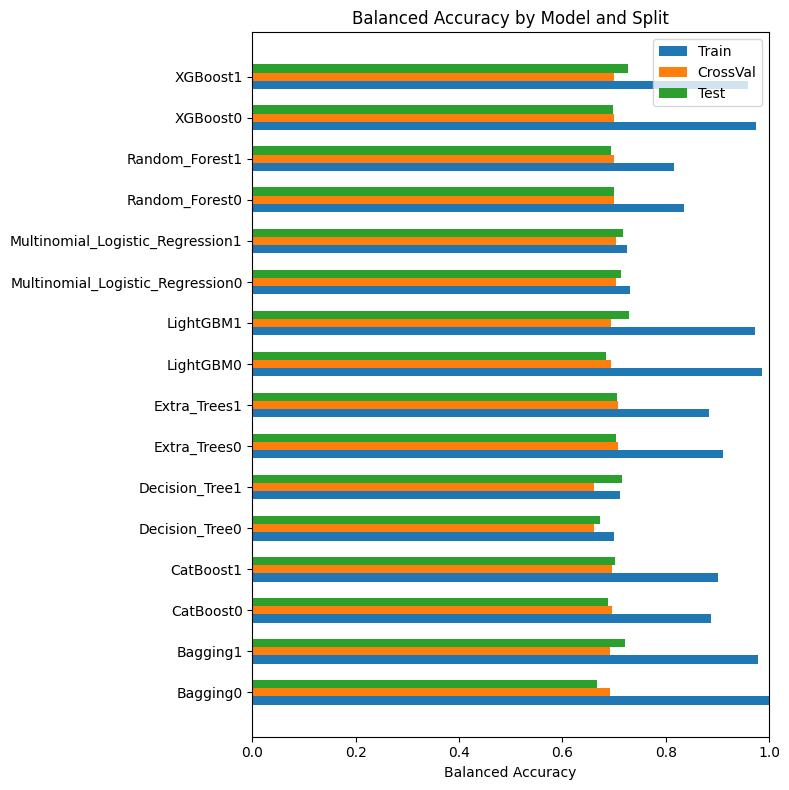


Confusion matrices (raw counts) - TEST SET:


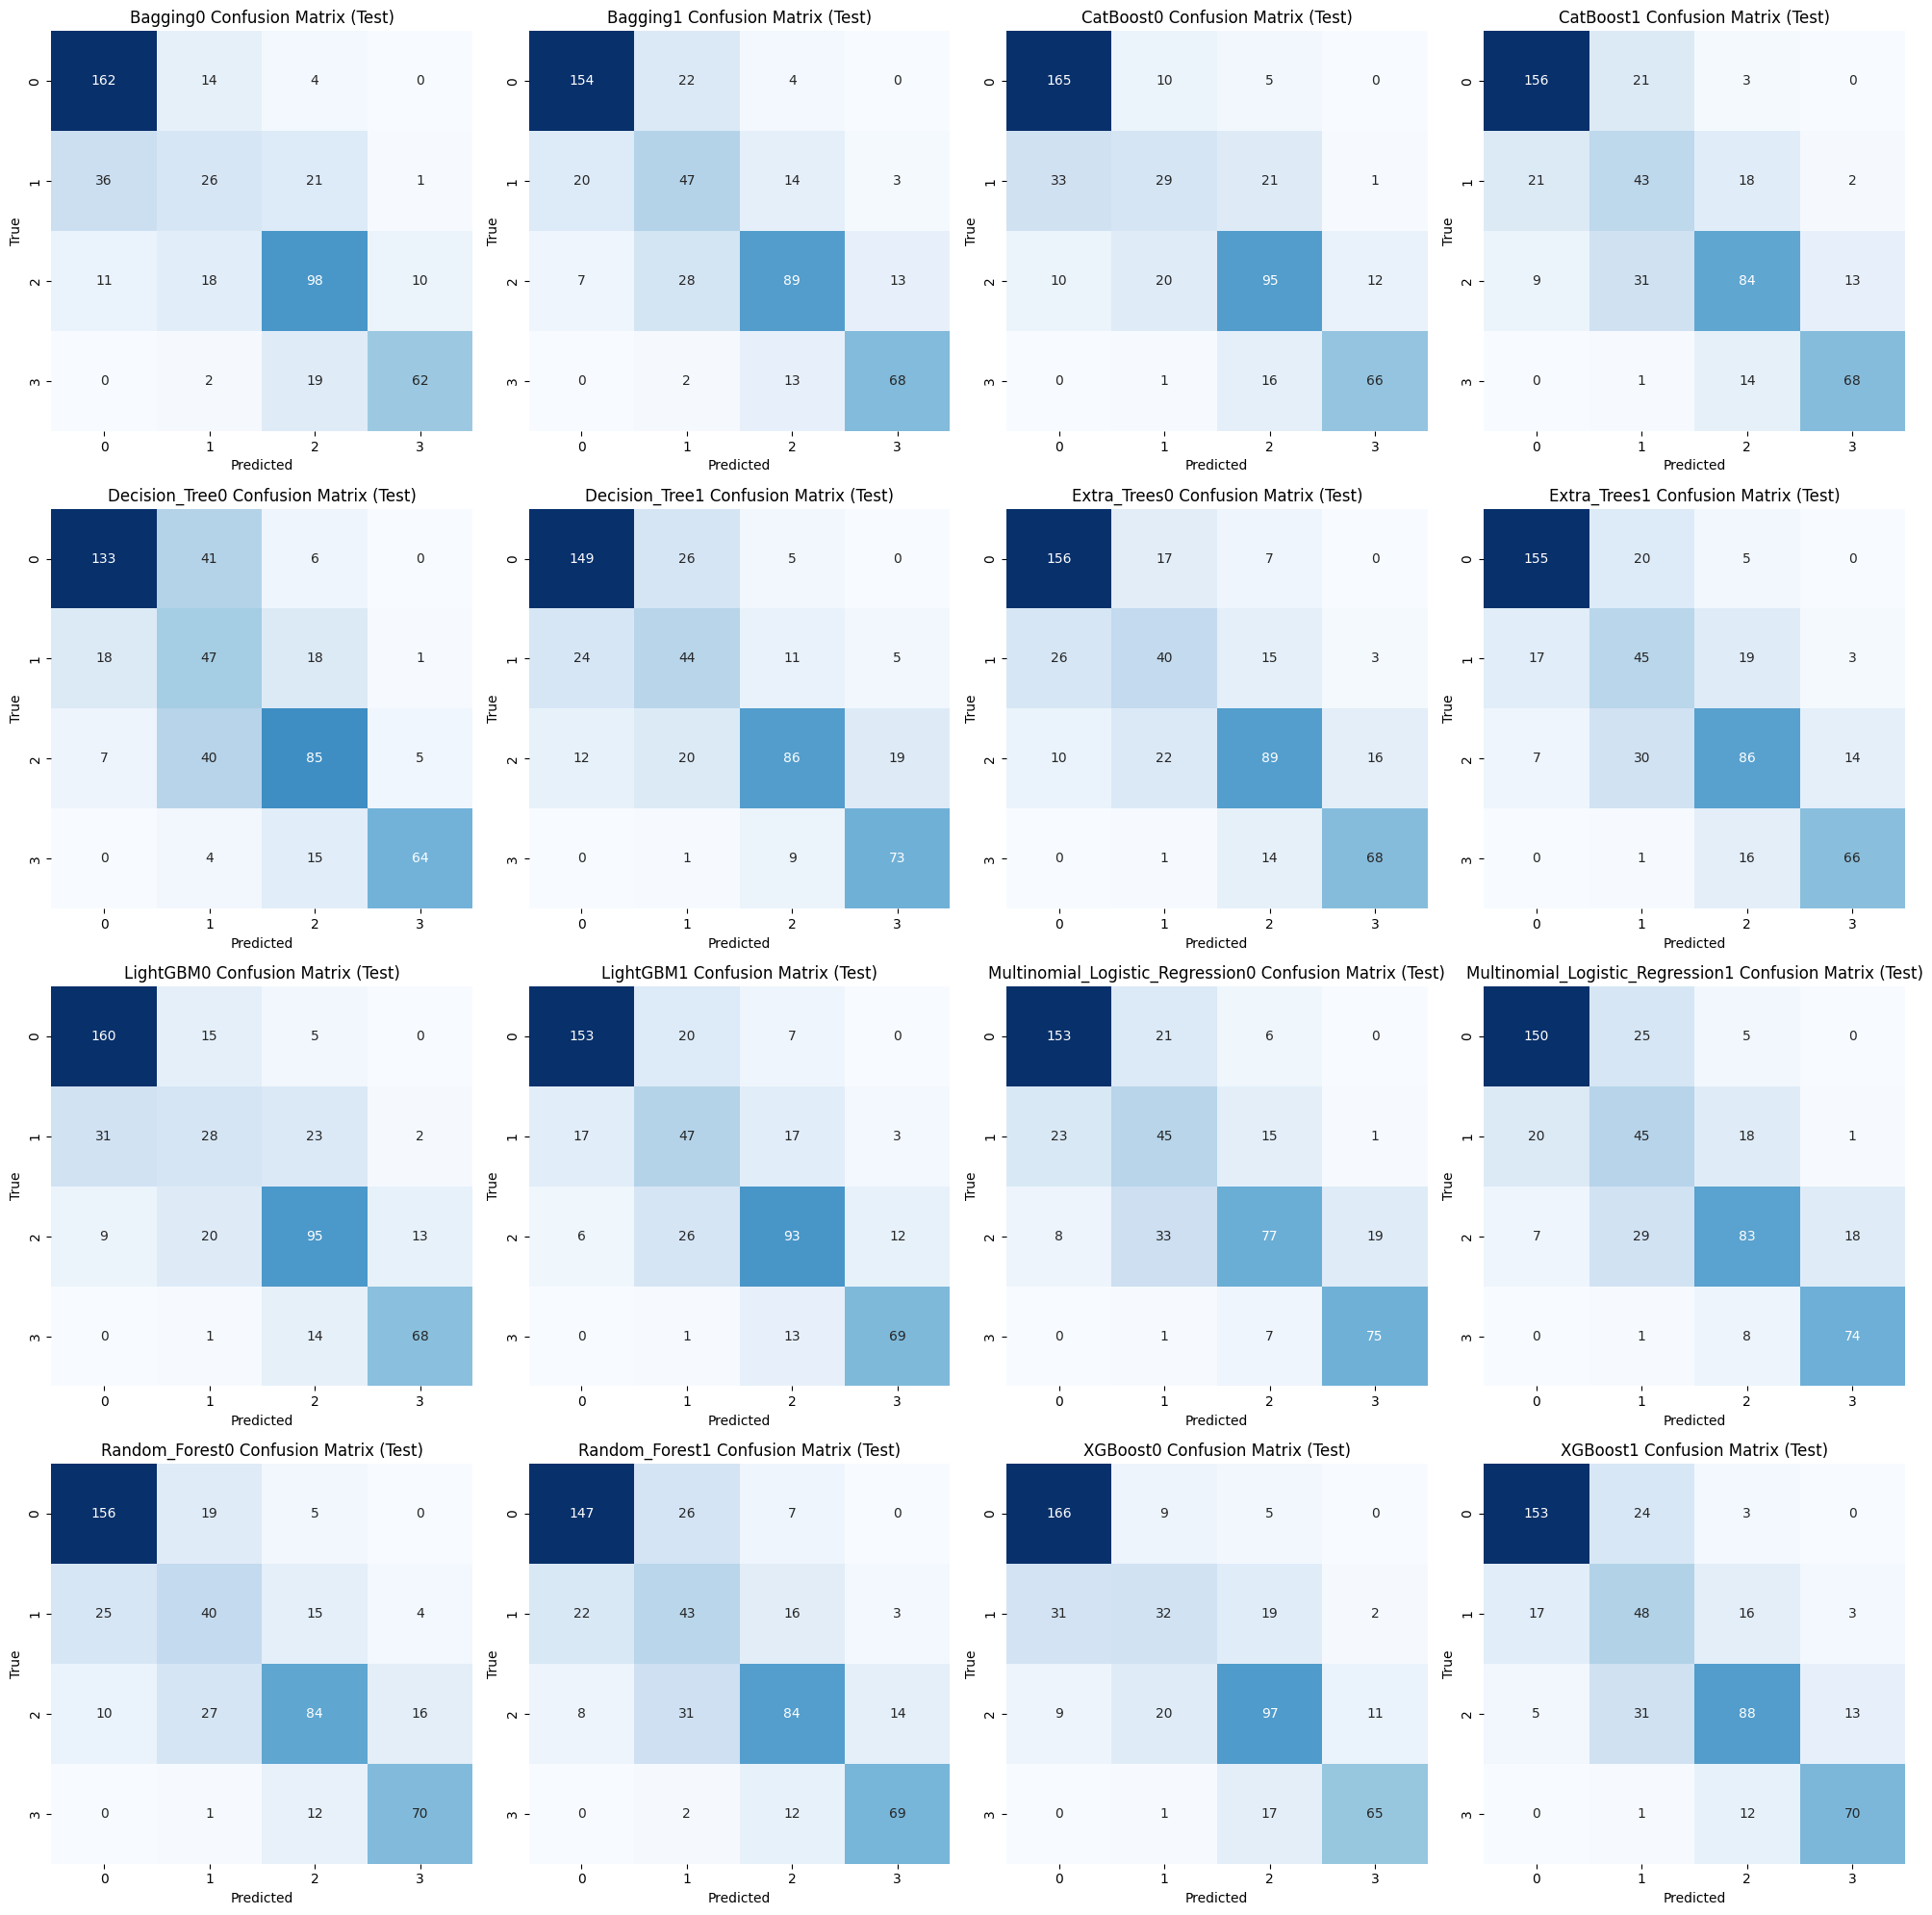


Confusion matrices (normalized by true-row) - TEST SET:


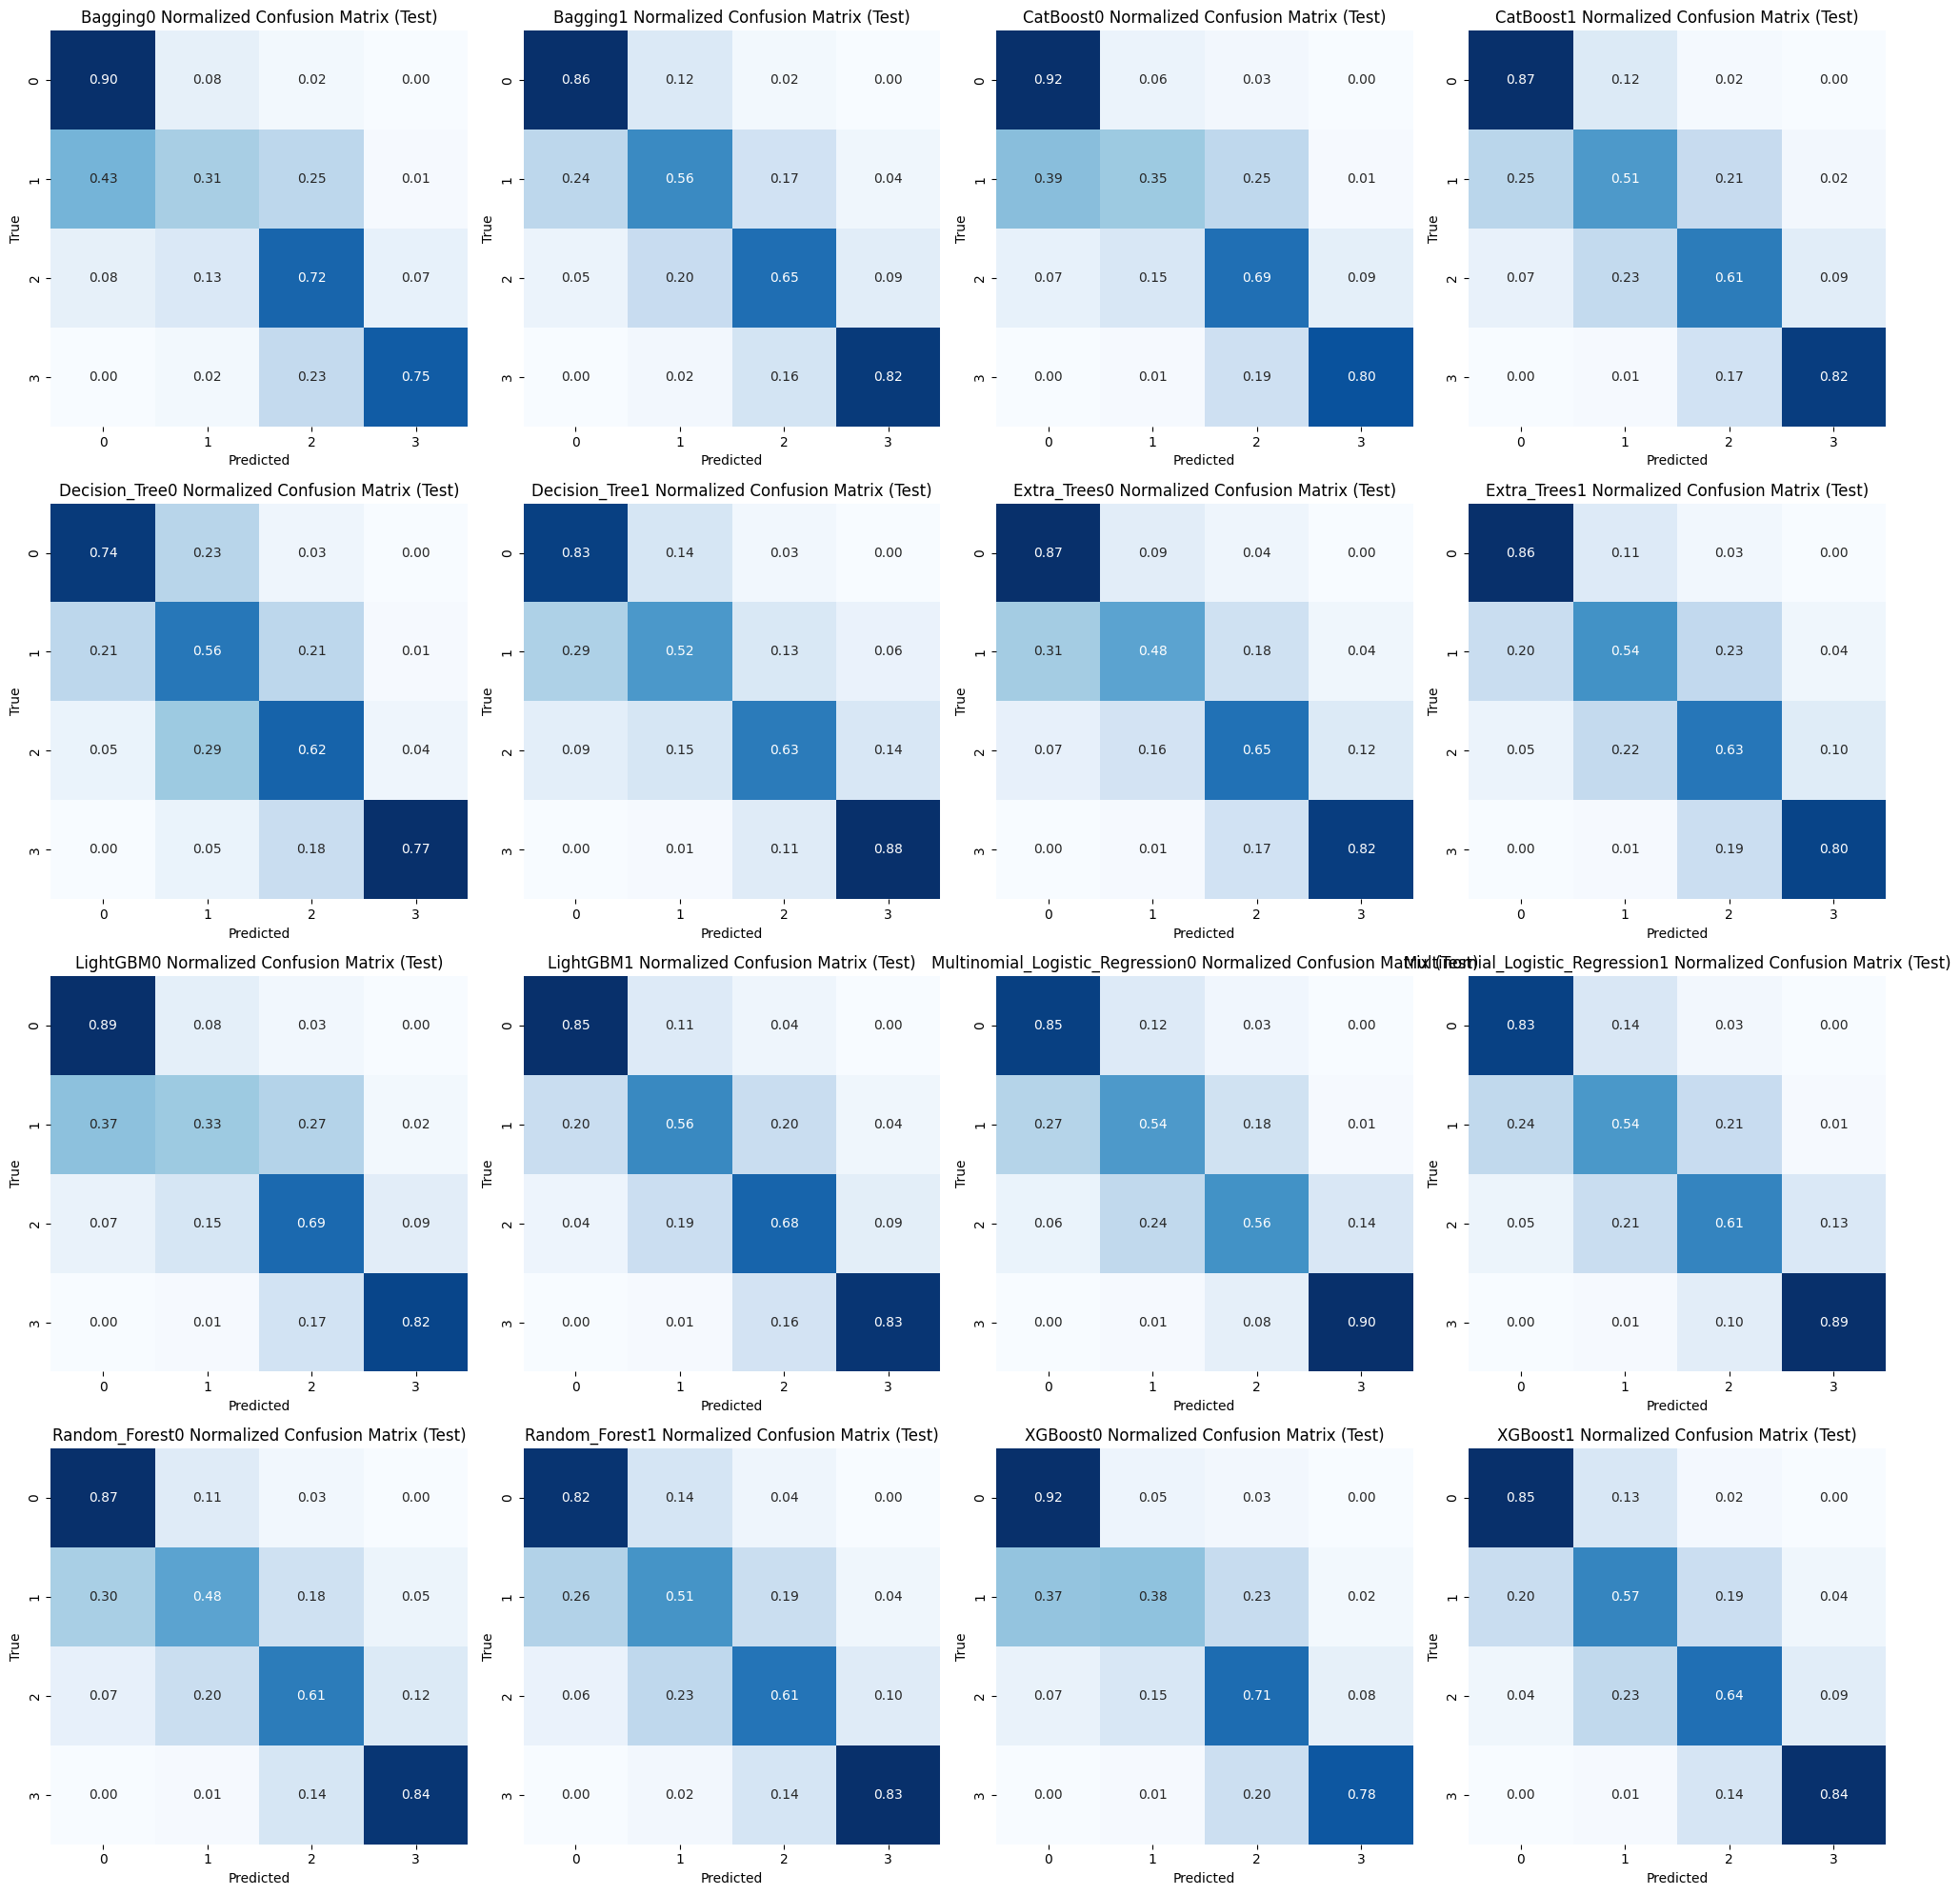


Overall comparison on TEST SET (sorted by Balanced Accuracy):


,Accuracy,Balanced Accuracy,Precision (weighted),Recall (weighted),F1 Score (weighted),F1 Score (macro),ROC AUC (macro)
Model,,,,,,,
LightGBM1,0.747934,0.729920,0.753437,0.747934,0.750214,0.727654,0.912863
XGBoost1,0.741736,0.726784,0.754152,0.741736,0.745854,0.722128,0.911205
Bagging1,0.739669,0.720998,0.747576,0.739669,0.742151,0.718456,0.911220
Multinomial_Logistic_Regression1,0.727273,0.716613,0.735808,0.727273,0.728819,0.707933,0.907839
Decision_Tree1,0.727273,0.714711,0.731811,0.727273,0.726317,0.705989,0.878772
Multinomial_Logistic_Regression0,0.723140,0.712843,0.730304,0.723140,0.722172,0.702213,0.908178
Extra_Trees1,0.727273,0.704936,0.732952,0.727273,0.729398,0.703171,0.907563
Extra_Trees0,0.729339,0.702942,0.724520,0.729339,0.726074,0.701476,0.906211
CatBoost1,0.725207,0.702747,0.729956,0.725207,0.726203,0.701441,0.913008


In [4]:
X_train.drop(columns=['CDRSB', 'LDELTOTAL', 'mPACCdigit'], axis=1, inplace=True)
X_test.drop(columns=['CDRSB', 'LDELTOTAL', 'mPACCdigit'], axis=1, inplace=True)
out2 = classifier.evaluate_models_from_dir(
                models_dir="../results/all_models/2",
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                cv_splits=5, cv_repeats=3,
                display_individual_tables=False
            )

***LightGBM1***, the LightGBM model created with Hybrid Sampling, achieves the best Balanced Accuracy on the test set (0.7299), meaning the best average ability to correctly classify classes even in the presence of imbalance. The correlated metrics are also solid: weighted Precision/Recall and weighted F1 are among the highest (example: weighted F1 ≈ 0.7502), and the macro ROC-AUC is high (≈0.9129), so it maintains good discrimination even when removing those three clinical scores. **XGBoost1** and **Bagging1** are close, but ***LightGBM1*** remains first in Balanced Accuracy and Absolute Accuracy, so I prefer it as a primary selection.

***In summary, we choose LightGBM1 because, without those three informative clinical scores, it is the model that best maintains balanced and discriminatory performance. We will call it Model2.*** 

Additionally, we choose a Decision Tree to favor a model with high explainability. ***We choose Decision_Tree1 given its greater balanced accuracy and its higher ROC-AUC score compared to Decision_Tree0. We will cal it XAIModel2.***

In [5]:
src_path = "../results/all_models/2/LightGBM1.pkl"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "Model2.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/2/Decision_Tree1.pkl"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel2.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/2/trees/Decision_Tree1_tree.pdf"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel2_tree.pdf")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/2/rules/Decision_Tree1_rules.txt"
dst_path = "../results"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel2_rules.txt")
shutil.copy2(src_path, dest_file)

print("Saved Models: Model2, XAIModel2")

Saved Models: Model2, XAIModel2
